# <font style = "color:rgb(50,120,229)">기학학적 변환 (Affine Transform)</font>

Affine transform : 
-이동(translation), 축소/확대(scaling), 회전(rotation), 찌그러짐(shear) 으로 만들어지는 변환
-입력영상이 사각형이면 출력영상은 모든 평행사변형을 만들 수 있음
-마름모꼭은 안됨 (perspective transform 혹은 homograpy)

OpenCV에서는 2 x 3 인 변환행렬로 표현됨

$$
A = \begin{bmatrix} a & b & t_x \\ c & d & t_y \end{bmatrix}
$$

원 영상에서 (x, y) 점은 affine 변환을 거쳐 (${x_t}$, ${y_t}$) 점으로 이동함

$$
\begin{bmatrix} x_t \\ y_t \end{bmatrix} = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} t_x \\ t_y \end{bmatrix}
$$


변환행렬 M이 주어지면 OpenCV 에서 [**`warpAffine`**] (https://docs.opencv.org/4.1.0/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983). 을 이용해서 입력영상을 출력영상으로 변환함

```python
dst	=	cv2.warpAffine(	src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]	)
```

**Parameters**

- **`src`**	input image.
- **`dst`**	output image that has the size dsize and the same type as src .
- **`M`**	2×3 transformation matrix.
- **`dsize`**	size of the output image.
- **`flags`**	combination of interpolation methods (see InterpolationFlags) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( dst→src ).
- **`borderMode`**	pixel extrapolation method (see BorderTypes); when borderMode=BORDER_TRANSPARENT, it means that the pixels in the destination image corresponding to the "outliers" in the source image are not modified by the function.
- **`borderValue`**	value used in case of a constant border; by default, it is 0.

### <span style = "color:rgb(8,133,37)">프로그램 예</span>. 

In [0]:
# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

np.set_printoptions(precision=2)

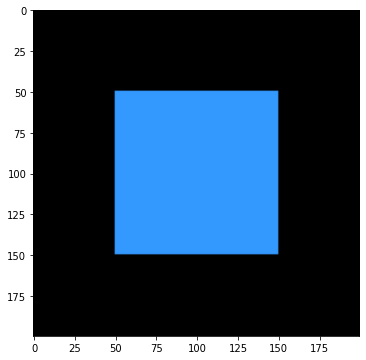

In [18]:
# Create a black image of size 200x200
im = np.zeros((200,200,3), np.float32)

# Create a blue square in the center
im[50:150,50:150,0] = 1;
im[50:150,50:150,1] = 0.6;
im[50:150,50:150,2] = 0.2

# Display image
plt.imshow(im[:,:,::-1])
plt.show()

### <span style = "color:rgb(8,133,37)">이동(Translate) 변환행렬</span>

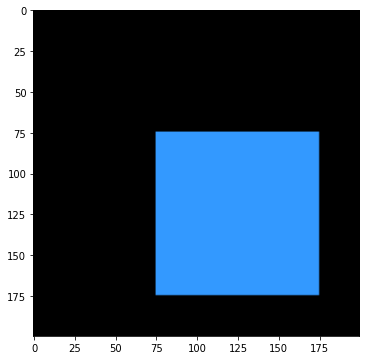

In [19]:
# Output dimension
outDim = im.shape[0:2]

# Translate by 25,25
warpMat = np.float32(
    [
        [1.0, 0.0, 25],
        [0,   1.0, 25]
    ])

# Warp image
result = cv2.warpAffine(im, warpMat, outDim)

# Display image
plt.imshow(result[...,::-1])

### <span style = "color:rgb(8,133,37)">Scale(확대 축소) 변환행렬</span>

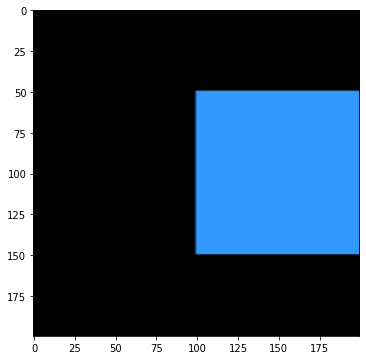

In [20]:
# Scale along x direction
warpMat = np.float32(
    [
        [2.0, 0.0, 0],
        [0,   1.0, 0]
    ])

# Warp image
result = cv2.warpAffine(im, warpMat, outDim)

# Display image
plt.imshow(result[...,::-1])


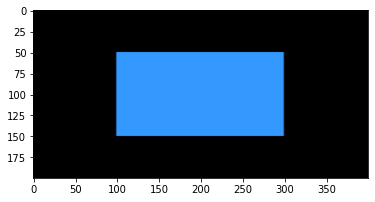

In [21]:
# Scale along x direction : 출력 영상 크기 바꾼 예
warpMat = np.float32(
    [
        [2.0, 0.0, 0],
        [0,   1.0, 0]
    ])

result = cv2.warpAffine(im, warpMat, (2 * outDim[0], outDim[1]))

# Display image
plt.imshow(result[...,::-1])


### <span style = "color:rgb(8,133,37)">원점에서 회전 변환행렬</span>

Let's say we want to rotate a point $(x, y)$ about the original by an angle $\theta$. The new point $(x', y')$ after rotation is given by 

$$
\begin{bmatrix} 
   x' \\ y' 
\end{bmatrix} = \begin{bmatrix} 
   \cos \theta & \sin \theta \\ 
  -\sin \theta & \cos \theta 
\end{bmatrix} \begin{bmatrix} 
   x \\ y
\end{bmatrix}
$$

You can read about it more at this link [Rotation Matrix](https://en.wikipedia.org/wiki/Rotation_matrix). You may notice a difference in sign between our matrix and that of Wikipedia. It is simply because of the difference in what is considered positive $\theta$ -- anti-clockwise vs. clockwise. 


The affine matrix is given by. 

$$
\begin{bmatrix} 
   \cos \theta & \sin \theta & 0 \\ 
  -\sin \theta & \cos \theta & 0 
\end{bmatrix}
$$

Notice, the first two columns form the rotation matrix, and the last column indicates zero translation.



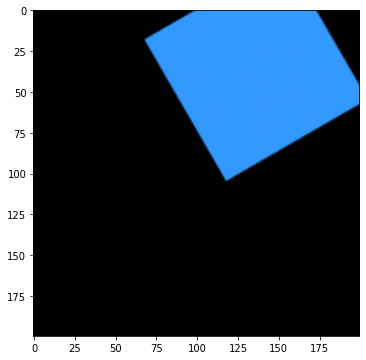

In [22]:
# Rotate image 
angleInDegrees = 30
angleInRadians = 30 * np.pi / 180.0

cosTheta = np.cos(angleInRadians)
sinTheta = np.sin(angleInRadians)

# Rotation matrix 
# https://en.wikipedia.org/wiki/Rotation_matrix
    
warpMat = np.float32(
    [
        [ cosTheta, sinTheta, 0],
        [ -sinTheta, cosTheta, 0]
    ])

# Warp image
result = cv2.warpAffine(im, warpMat, outDim)

# Display image
plt.imshow(result[...,::-1])



### <span style = "color:rgb(8,133,37)">임의의 중심점에서 회전 변환행렬</span>

Let's say we want to rotate a point $(x, y)$ about a specific point $(x_c, y_c)$. This point is called the **center** of rotation. The affine matrix that does this is given by 

$$
\begin{bmatrix} 
   \cos \theta & \sin \theta &  x_c (1-\cos \theta)  - y_c \sin \theta   \\ 
  -\sin \theta &  \cos \theta & x_c \sin \theta + y_c ( 1 - \cos \theta)
\end{bmatrix}
$$

Here is a quick derivation for the above matrix. We can find the rotation about a specific center in three steps. 

1. Move the origin of the coordinate system to $(x_c, y_c)$. This can be done by subtracting $(x_c, y_c)$ from $(x, y)$.  
2. Use the rotation about the origin on the transformed point $(x - x_c, y - y_c)$
$$
\begin{bmatrix} 
   \cos \theta & \sin \theta\\ 
  -\sin \theta & \cos \theta
\end{bmatrix} \begin{bmatrix} 
   x - x_c\\ 
   y - y_c
\end{bmatrix}
$$
3. Add back the subtracted point $(x_c, y_c)$ 
$$
\begin{align}
\begin{bmatrix} 
   x'\\ 
   y' 
\end{bmatrix} &= \begin{bmatrix} 
   \cos \theta & \sin \theta\\ 
  -\sin \theta & \cos \theta
\end{bmatrix} \begin{bmatrix} 
   x - x_c\\ 
   y - y_c
\end{bmatrix} + \begin{bmatrix} 
   x_c\\ 
   y_c
\end{bmatrix} \\
&= \begin{bmatrix} 
   \cos \theta & \sin \theta\\ 
  -\sin \theta & \cos \theta
\end{bmatrix} \begin{bmatrix} 
   x\\ 
   y
\end{bmatrix} + \begin{bmatrix} 
   x_c (1-\cos \theta)  - y_c \sin \theta\\ 
   x_c \sin \theta + y_c ( 1 - \cos \theta)
\end{bmatrix}
\end{align}
$$

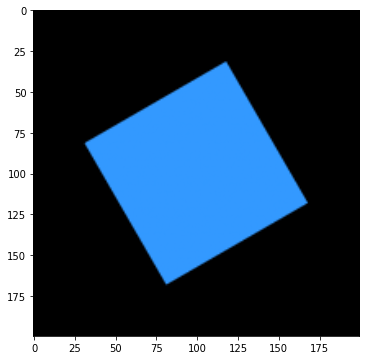

In [23]:
# Rotate image 
angleInDegrees = 30
angleInRadians = 30 * np.pi / 180.0

cosTheta = np.cos(angleInRadians)
sinTheta = np.sin(angleInRadians)

centerX = im.shape[0] / 2
centerY = im.shape[1] / 2

tx = (1-cosTheta) * centerX - sinTheta * centerY
ty =  sinTheta * centerX  + (1-cosTheta) * centerY

# Rotation matrix 
# https://en.wikipedia.org/wiki/Rotation_matrix
    
warpMat = np.float32(
    [
        [ cosTheta, sinTheta, tx],
        [ -sinTheta,  cosTheta, ty]
    ])

# Warp image
result = cv2.warpAffine(im, warpMat, outDim)

# Display image
plt.imshow(result[...,::-1])



### <span style = "color:rgb(8,133,37)">getRotationMatrix2D로 변환행렬 만들기</span>

We can also use a built in function **getRotationMatrix2D** to rotate the image about any center. The syntax is given below. 

```python
retval	=	cv2.getRotationMatrix2D(	center, angle, scale	)
```

**Parameters**
- **`center`** - Center of the rotation in the source image.
- **`angle`** - Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the -top-left corner).
- **`scale`** - Isotropic scale factor.


rotationMatrix :
 [[  0.87   0.5  -36.6 ]
 [ -0.5    0.87  63.4 ]]
inPts 
 [[ 50.  50. 149. 149.]
 [ 50. 149.  50. 149.]]
outPts 
 [[ 31.7   81.2  117.44 166.94]
 [ 81.7  167.44  32.2  117.94]]


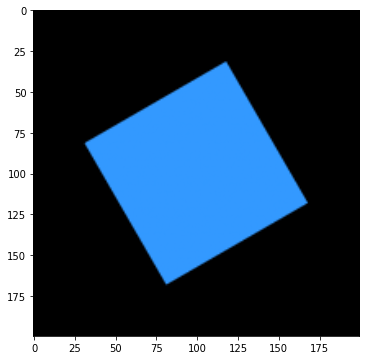

In [25]:
# Get rotation matrix
rotationMat = cv2.getRotationMatrix2D((centerX, centerY), angleInDegrees, 1)

# monitor
print('rotationMatrix :\n', rotationMat)
inPts = np.float32([[50, 50],[50, 149],[149, 50], [149, 149]]).T
rotatePts = np.matmul(rotationMat[:,:2], inPts) + rotationMat[:,2].reshape(-1,1)
print('inPts \n', inPts)
print('outPts \n', rotatePts)

# Warp Image
im_rotate = cv2.warpAffine(im, rotationMat, outDim)

# Display image
plt.imshow(im_rotate[...,::-1])

### <span style = "color:rgb(8,133,37)">Shear Transformation</span>

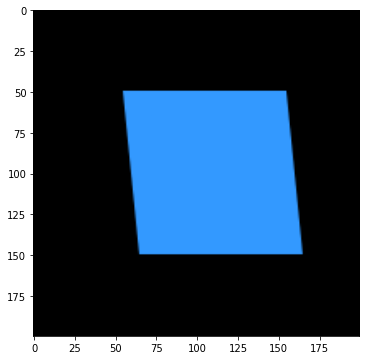

In [26]:
shearAmount = 0.1

warpMat = np.float32(
    [
        [ 1, shearAmount, 0],
        [ 0, 1.0        , 0]
    ])


# Warp image
result = cv2.warpAffine(im, warpMat, outDim, None, flags=cv2.INTER_LINEAR)

# Display image
plt.imshow(result[...,::-1])


### <span style = "color:rgb(8,133,37)">기하학적 변환 합치기</span>

여러개의 기하학적 변환 (rotation, scale, shear, and translate)을 합쳐 하나의 변환 행렬을 만들 수 있다. 이동(translation)은 제외한 2x2행렬을 matmul(혹은 @연산)로 곱하면 된다.  계산 결과 행렬에 이동을 추가해서 변환행렬(2x3행렬)을 만든다.


affine transform Matrix :
 [[ 1.08  0.08 10.  ]
 [-0.19  1.1   0.  ]]
inPts 
 [[ 50.  50. 149. 149.]
 [ 50. 149.  50. 149.]]
outPts 
 [[ 68.3   76.48 175.54 183.73]
 [ 45.57 154.71  26.66 135.8 ]]


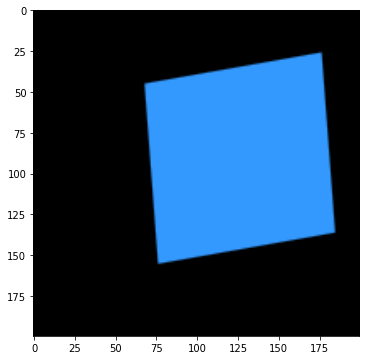

In [27]:
# Scale 
scaleAmount = 1.1
scaleMat = np.float32(
    [
        [ scaleAmount, 0.0,       ],
        [ 0,           scaleAmount]
    ])

# Shear 
shearAmount = -0.1 
shearMat = np.float32(
    [
        [ 1, shearAmount],
        [ 0, 1.0        ]
    ])

# Rotate by 10 degrees about (0,0)

angleInRadians = 10.0 * np.pi / 180.0

cosTheta = np.cos(angleInRadians)
sinTheta = np.sin(angleInRadians)

rotMat = np.float32(
    [
        [ cosTheta, sinTheta],
        [ -sinTheta, cosTheta]
    ])

translateVector = np.float32(
    [
        [10],
        [0]
    ])

# First scale is applied, followed by shear, followed by rotation. 
scaleShearRotate = rotMat @ shearMat @ scaleMat

# Add translation
affineMat = np.append(scaleShearRotate, translateVector, 1)
print('affine transform Matrix :\n', affineMat)
inPts = np.float32([[50, 50],[50, 149],[149, 50], [149, 149]]).T
affinePts = np.matmul(affineMat[:,:2], inPts) + affineMat[:,2].reshape(-1,1)
print('inPts \n', inPts)
print('outPts \n', affinePts)

# Warp image
im_affine = cv2.warpAffine(im, affineMat, outDim)

# Display image
plt.imshow(im_affine[...,::-1])

### <span style = "color:rgb(8,133,37)">대응점에서 변환행렬 구하기</span>

Affine transform은 미지수가 6개 있음 (6 degrees of freedom)
- translation 1개 (tx, ty)
- scale 1개 (sx, sy) 
- shear 1개
- rotation  1개

#### estimateAffine2D 사용
입력영상과 출력영상에서 대응점이 3개 있으면 각 대응점은 x,y 좌표가 있으므로 6개 수식을 만들 수 있어 미지수 6개를 구할 수 있음
대응점이 3개보다 많아지면 더 정확한 결과를 얻을 수 있음

#### 대응점이 2개인 경우 : estimateAffinePartial2D 사용
대응점이 2개만 있는 경우 미지수를 4개로 줄임(더 간단한 변형이라고 가정함)
- translation 1개 (tx, ty)
- scale 1개 s  : sx=sy=s 
- rotation  1개
- (shear는 없다고 가정함)

#### 대응점 3개인 경우 : transform Matrix 구할 수 있음

In [28]:
srcPoints = np.float32([[50, 50],[50, 149],[149, 50]])
dstPoints_affine = np.float32([[68, 45],[76, 155],[176, 27]]) # Rotate/Scale/Shear
estimatedMat = cv2.estimateAffine2D(srcPoints, dstPoints_affine)[0]
print("True warp matrix (affine):\n", affineMat)
print("Estimated warp matrix:\n", estimatedMat)

dstPoints_rot = np.float32([[32, 82], [81, 167], [117, 32]]) # Rotate
estimatedMat = cv2.estimateAffine2D(srcPoints, dstPoints_rot)[0]
print("True warp matrix (rotation):\n", rotationMat)
print("Estimated warp matrix:\n", estimatedMat)


True warp matrix (affine):
 [[ 1.08  0.08 10.  ]
 [-0.19  1.1   0.  ]]
Estimated warp matrix:
 [[ 1.09  0.08  9.41]
 [-0.18  1.11 -1.46]]
True warp matrix (rotation):
 [[  0.87   0.5  -36.6 ]
 [ -0.5    0.87  63.4 ]]
Estimated warp matrix:
 [[  0.86   0.49 -35.68]
 [ -0.51   0.86  64.32]]


#### 대응점이 2개인 경우 : estimateAffinePartial2D
- Rotation, Translation, (isotropic)scaling 는 추정할 수 있음
- Shear가 있는 경우는 부정확

In [29]:
# Affine에 대응점이 2개만 있으면 부정확
np.set_printoptions(precision=3)
srcPoints = np.float32([[50, 50],[50, 149]])
dstPoints_affine = np.float32([[68, 45],[76, 155]]) # Rotate/Scale/Shear
estimatedMat = cv2.estimateAffinePartial2D(srcPoints, dstPoints_affine)[0]
print("True warp matrix (affine):\n", affineMat)
print("Estimated warp matrix:\n", estimatedMat)

# shear가 없으면 대응점 2개로 가능
dstPoints_rot = np.float32([[32, 82], [81, 167]]) # Rotate
estimatedMat = cv2.estimateAffinePartial2D(srcPoints, dstPoints_rot)[0]
print("True warp matrix (rotation):\n", rotationMat)
print("Estimated warp matrix:\n", estimatedMat)

dstPoints_rot = np.float32([[32, 82], [81, 167]]) # Rotate
estimatedMat = cv2.estimateAffine2D(srcPoints, dstPoints_rot)[0]
print("True warp matrix (rotation):\n", rotationMat)
print("Estimated warp matrix:\n", estimatedMat)


True warp matrix (affine):
 [[ 1.083  0.083 10.   ]
 [-0.191  1.102  0.   ]]
Estimated warp matrix:
 [[ 1.111  0.081  8.404]
 [-0.081  1.111 -6.515]]
True warp matrix (rotation):
 [[  0.866   0.5   -36.603]
 [ -0.5     0.866  63.397]]
Estimated warp matrix:
 [[  0.859   0.495 -35.677]
 [ -0.495   0.859  63.818]]
True warp matrix (rotation):
 [[  0.866   0.5   -36.603]
 [ -0.5     0.866  63.397]]
Estimated warp matrix:
 None


#### 대응점이 4개 이상인 경우 : 더 정확한 결과

In [30]:
srcPoints = np.float32([[50, 50],[50, 149],[149, 149], [149, 50]])
dstPoints_affine = np.float32([[68, 45],[76, 155],[183, 135], [176, 27]])

estimatedMat = cv2.estimateAffine2D(srcPoints, dstPoints_affine)[0]

print("True warp matrix:\n", affineMat)
print("Estimated warp matrix:\n", estimatedMat)

True warp matrix:
 [[ 1.083  0.083 10.   ]
 [-0.191  1.102  0.   ]]
Estimated warp matrix:
 [[ 1.086  0.076 10.169]
 [-0.192  1.101  0.045]]


Just for fun, let us visually inspect by warping the original image using this transform we have obtained. It looks indistinguishable from the image we had obtained using explicit matrix multiplication. 

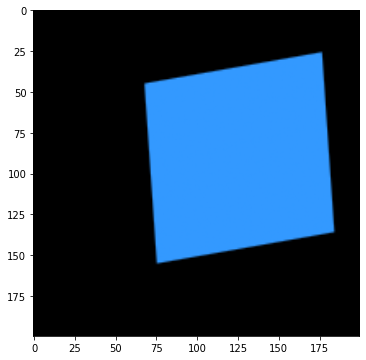

In [31]:
# Warp image
result = cv2.warpAffine(im, estimatedMat, outDim)

# Display image
plt.imshow(result[...,::-1])
